In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

from datetime import datetime

import subprocess
import os

mpl.rcParams['figure.figsize'] = (16, 9)

# Standard process in data science
!['CRISP_DM'](../reports/figures/CRISP_DM.png)


# Data Preparation

* Data strcture must be clear and understandable
* Visulize data into plots and graphs

## GitHub CSV data : John Hopkins 

First we will scrap data for confirmed cases country wise and will do it for limited number of countries

In [2]:
git_repo = 'https://github.com/CSSEGISandData/COVID-19.git'
git_clone = subprocess.Popen( "git clone " + git_repo ,
                         cwd = os.path.dirname( '../data/raw/' ),
                         shell = True,
                         stdout = subprocess.PIPE,
                         stderr = subprocess.PIPE )
(out, error) = git_clone.communicate()

print('out:', out)
print('error:', error)

out: b''
error: b"fatal: destination path 'COVID-19' already exists and is not an empty directory.\n"


In [3]:
# load data from csv file
filepath = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw_confirmed = pd.read_csv(filepath)

pd_raw_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


## Filter raw data

In [4]:
t_idx = pd_raw_confirmed.columns[4:]

df_confirmed = pd.DataFrame({'date':t_idx})
df_confirmed.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [5]:
# get daily cases for one counrty e.g. Germany
pd_raw_confirmed[pd_raw_confirmed['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[-4:]

8/18/20    228120
8/19/20    229706
8/20/20    231292
8/21/20    233029
dtype: int64

In [6]:
# do same for multiple countries
countries =['Italy', 'US', 'Spain', 'Germany', 'Russia' , 'India', 'Brazil'] 

for con in countries:
    df_confirmed[con]=np.array(pd_raw_confirmed[pd_raw_confirmed['Country/Region']==con].iloc[:,4::].sum(axis=0))
    
df_confirmed.tail()

,date,Italy,US,Spain,Germany,Russia,India,Brazil
208,8/17/20,254235,5438325,359082,226700,925558,2702681,3359570
209,8/18/20,254636,5482416,364196,228120,930276,2767253,3407354
210,8/19/20,255278,5529824,370867,229706,935066,2836925,3456652
211,8/20/20,256118,5573847,377906,231292,939833,2905825,3501975
212,8/21/20,257065,5622540,386054,233029,944671,2975701,3532330


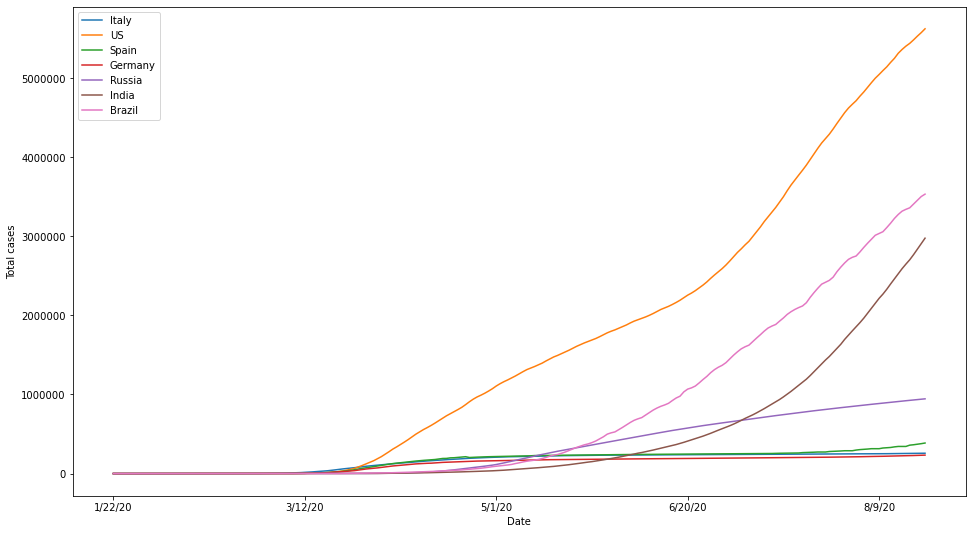

In [7]:
df_confirmed.set_index('date').plot()
plt.xlabel('Date')
plt.ylabel('Total cases')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

## Datatype of date 

In [8]:
df_confirmed.tail()

,date,Italy,US,Spain,Germany,Russia,India,Brazil
208,8/17/20,254235,5438325,359082,226700,925558,2702681,3359570
209,8/18/20,254636,5482416,364196,228120,930276,2767253,3407354
210,8/19/20,255278,5529824,370867,229706,935066,2836925,3456652
211,8/20/20,256118,5573847,377906,231292,939833,2905825,3501975
212,8/21/20,257065,5622540,386054,233029,944671,2975701,3532330


In [9]:
# convert to datetime df_confirmed
t_idx = [datetime.strptime(date,"%m/%d/%y") for date in df_confirmed.date] 
# convert back to date ISO norm (str)
t_str = [each.strftime('%Y-%m-%d') for each in t_idx] 

# set back to DataFrame
df_confirmed['date'] = t_idx

In [10]:
# cross check
type(df_confirmed['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df_confirmed.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

### Scrap recovered and currently infected cases and deaths

In [12]:
 def store_JH_small_data(filepath, country_list):
    # load data from csv file
    df = pd.read_csv(filepath)
    
    t_idx = df.columns[4:]
    
    df_processed = pd.DataFrame({'date':t_idx})
    
    for each in country_list:
        df_processed[each]=np.array(df[df['Country/Region']==each].iloc[:,4::].sum(axis=0))
    
    t_idx = [datetime.strptime(date,"%m/%d/%y") for date in df_processed.date] 
    df_processed['date'] = t_idx
    return df_processed

#### Recovered 

In [13]:
filepath = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered = store_JH_small_data(filepath, countries)
df_recovered.tail()

,date,Italy,US,Spain,Germany,Russia,India,Brazil
208,2020-08-17,203968,1865580,150376,202249,734573,1977671,2699080
209,2020-08-18,204142,1898159,150376,203677,741045,2037816,2751246
210,2020-08-19,204506,1925049,150376,204454,747802,2096664,2801931
211,2020-08-20,204686,1947035,150376,205359,753868,2158946,2844318
212,2020-08-21,204960,1965056,150376,206656,759639,2222577,2855558


In [14]:
df_recovered.to_csv('../data/processed/COVID_small_flat_table_recovered.csv',sep=';',index=False)

#### Deaths

In [15]:
filepath = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths = store_JH_small_data(filepath, countries)
df_deaths.tail()

,date,Italy,US,Spain,Germany,Russia,India,Brazil
208,2020-08-17,35400,170497,28646,9236,15707,51797,108536
209,2020-08-18,35405,171821,28670,9241,15836,52888,109888
210,2020-08-19,35412,173177,28797,9249,15951,53866,111100
211,2020-08-20,35418,174255,28813,9263,16058,54849,112304
212,2020-08-21,35427,175363,28838,9266,16148,55794,113358


In [16]:
df_deaths.to_csv('../data/processed/COVID_small_flat_table_deaths.csv',sep=';',index=False)

#### Infected

In [17]:
df_infected = pd.DataFrame()
df_infected['date'] = t_idx
df_infected = pd.concat([df_infected, df_confirmed.iloc[:, 1::] - df_recovered.iloc[:, 1::] - df_deaths.iloc[:, 1::]], 
                        axis=1)

In [18]:
df_infected.to_csv('../data/processed/COVID_small_flat_table_infected.csv',sep=';',index=False)

## Relational data model - defining a primary key

A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain NaN values.

In [19]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [20]:
# adjust column name
pd_data_base = pd_raw.rename(columns = {'Country/Region':'country',
                                    'Province/State':'state'})
pd_data_base['state'] = pd_data_base['state'].fillna('no')

# drop unnecessary columns
pd_data_base = pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894
1,no,Albania,0,0,0,0,0,0,0,0,...,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119
2,no,Algeria,0,0,0,0,0,0,0,0,...,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667
3,no,Andorra,0,0,0,0,0,0,0,0,...,977,981,989,989,989,1005,1005,1024,1024,1045
4,no,Angola,0,0,0,0,0,0,0,0,...,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068


In [21]:
pd_relational=pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().rename(columns={'level_0': 'date',
                                                                                                             0:'confirmed'
                                                                                                            })
pd_relational.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [22]:
pd_relational.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [23]:
# chnage datatype of date
pd_relational['date'] = pd_relational.date.astype('datetime64[ns]')
pd_relational['confirmed'] = pd_relational.confirmed.astype(int)

In [24]:
pd_relational.dtypes

date         datetime64[ns]
state                object
country              object
confirmed             int32
dtype: object

In [25]:
pd_relational[pd_relational['country']=='US'].tail()

,date,state,country,confirmed
55580,2020-08-17,no,US,5438325
55846,2020-08-18,no,US,5482416
56112,2020-08-19,no,US,5529824
56378,2020-08-20,no,US,5573847
56644,2020-08-21,no,US,5622540


In [26]:
pd_relational.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

## Rational data model for US region from John Hopkins dataset

In [27]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1188,1196,1196,1206,1218,1219,1235,1241,1240,1255
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3710,3744,3791,3839,3877,3888,3906,3931,3957,3997
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,581,586,590,598,604,605,606,613,619,622
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,453,457,465,469,469,474,476,490,494,501
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,825,835,848,854,860,863,887,901,912,930


In [28]:
# remove unwated columns and chnage column names
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [29]:
# stack data in rational form
pd_relational_US=pd_data_base_US.set_index(['state']).T.stack().reset_index()                  \
                                    .rename(columns={'level_0':'date', 0:'confirmed'})

# convert to datetime
pd_relational_US['country']='US'
pd_relational_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_US.date] 
pd_relational_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [30]:
# merge US data into main rational DataFrame
pd_relational_model_all=pd_relational[pd_relational['country']!='US'].reset_index(drop=True)
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_US],ignore_index=True)

pd_relational_model_all[pd_relational_model_all['country']=='US'].tail()

,date,state,country,confirmed
767860,2020-08-21,Wyoming,US,399
767861,2020-08-21,Wyoming,US,283
767862,2020-08-21,Wyoming,US,0
767863,2020-08-21,Wyoming,US,106
767864,2020-08-21,Wyoming,US,11


In [31]:
# export data to csv
pd_relational_model_all.to_csv('../data/processed/20200730_COVID_relational_confirmed.csv',sep=';',index=False)